# Classification Using Quantum Support Vector Machine

First we need to get a hold of the python script that parses and loads the datasets (datasets.py) for us. This file is provided by Qiskit tutorials [here](https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/advanced/aqua/artificial_intelligence/datasets.py).  

Generally for a support vector machine, the steps are as follows: 
Obtain the feature map by applying some non-linear transformation function to the data (classical). Then compute the kernals (quantum). The kernals are computed by using the inner product of each pair of data points in the new feature space (feature map). 

Due to the complexity of some datasets, computing the kernal is often not efficient, thus we will attemp to do this using quantum computing techniques instead.

In [1]:
# import the neccessary modules
from datasets import *

from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion


### Using a fictional ad hoc data set

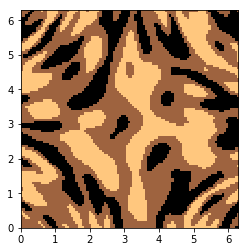

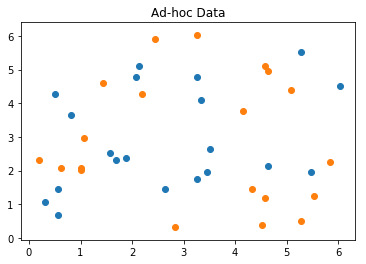

{'A': 0, 'B': 1}


In [2]:
feature_dim = 2 # at the time of writing, only 2 or 3 feature dimensions are supports.

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size = 20,
    test_size = 10,
    n = feature_dim,
    gap = 0.3,
    PLOT_DATA = True
)

extra_test_data = sample_ad_hoc_data(sample_Total, 10, n = feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)

print(class_to_label)

As we can see, the data above is rather complex. Before we can use the qsvm algorithm, we need to initialize the parameters (dictionary) and the object containing the datasets information. 

In [3]:
"""declarative approach
params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM'
    },
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
algo_input = ClassificationInput(training_input, test_input, datapoints[0])
result = run_algorithm(params, algo_input)
"""

seed = 50594

feature_map = SecondOrderExpansion(feature_dimension = feature_dim,
                                  depth = 2,
                                  entanglement = 'linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])
backend = BasicAer.get_backend ('qasm_simulator')
quantum_instance = QuantumInstance (backend, shots = 1024, seed = seed, seed_transpiler = seed)

qsvm_results = qsvm.run(quantum_instance)

In [4]:
# lets see how we did!
print(f"Testing accurary (0-1) = {qsvm_results['testing_accuracy']}")
print(f"expected outputs : {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}") 
print(f"prediction: {qsvm_results['predicted_classes']}")      

Testing accurary (0-1) = 1.0
expected outputs : ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


Training Kernal Matrix


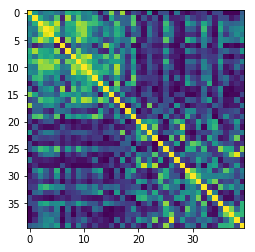

In [5]:
# let's see what the kernal matrix looks like
print("Training Kernal Matrix")
kernel_matrix = qsvm_results ['kernel_matrix_training']
kernels_mat_plot = plt.imshow(np.asmatrix(kernel_matrix))
plt.show()

### Real Dataset (Breast Cancer)

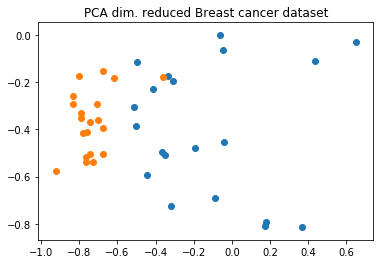

In [6]:
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size = 20,
                                                                      test_size = 10,
                                                                      n = 2,
                                                                      PLOT_DATA = True)

In [7]:
seed = 10598

feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed=seed, seed_transpiler=seed)

qsvm_results = qsvm.run(quantum_instance)

In [8]:
# Let's see our success rate !
print(f"Sucess Ratio (0-1) = {qsvm_results['testing_accuracy']}")
      

Sucess Ratio (0-1) = 0.8


Training Kernel Matrix


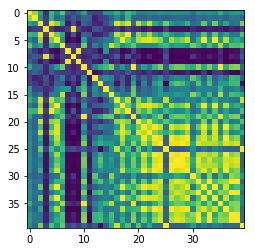

In [9]:
print("Training Kernel Matrix")
kernel_matrix = qsvm_results['kernel_matrix_training']
kernel_matrix_plot = plt.imshow(np.asmatrix(kernel_matrix))
plt.show()

## Retrieving the Quantum Circuits
This part is research with Professor Samah Saeed of CCNY. 

The goal is to retrieve the quantum circuits used. Looking into the QSVM source code, we can see that there is a built-in method that builds the circuits from the dataset. The real challenge is understanding how to call the method and how to read (and modify) the quantum circuits.

Let's start with the Breast Cancer data.

10598
